<a href="https://colab.research.google.com/github/HwangHanJae/datascience-basic-tect/blob/main/seaborn_ecdfplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

In [2]:
#라이브러리 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

In [3]:
#그래프가 잘보이게 하기 위해 'ggplot' 스타일을 사용
plt.style.use('ggplot')
#폰트가 선명하게 보이게 하기위하여
set_matplotlib_formats('svg')

###[ecdfplot - 경험적 (누적) 분포 함수](https://ko.wikipedia.org/wiki/%EA%B2%BD%ED%97%98%EC%A0%81_%EB%88%84%EC%A0%81_%EB%B6%84%ED%8F%AC_%ED%95%A8%EC%88%98)
- 표준 누적 분포 함수라고도 불림
- 반복된 시행을 통해 확률 변수가 일정 값을 넘지 않을 확률을 유추하는 함수
- 독립 동일 분포 확률 변수의 열의 경험적 누적 분포 함수는 거의 확실하게 실제 누적 분포 함수로 균등 수렴한다

###ecdfplot 실습에 사용할 데이터
- penguins
  - species(object) : 펭귄의 종
  - island(object) : 섬
  - bill_length_mm(float64) : 부리의 길이
  - bill_depth_mm(float64) : 부리의 깊이
  - flipper_length_mm(float64) : 팔의 길이
  - body_mass_g(float64) : 몸의 질량
  - sex(object) : 성별


####penguins

In [4]:
#데이터 로드하기
penguins = sns.load_dataset('penguins')

In [5]:
#데이터 정보
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
#데이터 수치적 요약
penguins.describe(include=np.number)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
#데이터 범주형 요약
penguins.describe(include='object')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In [8]:
#결측치 확인
penguins[penguins['sex'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


####그래프 확인

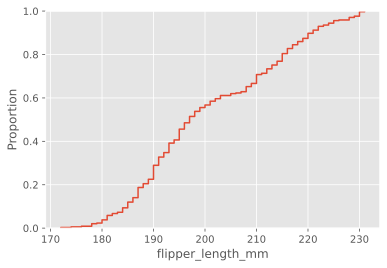

In [9]:
sns.ecdfplot(data=penguins, x='flipper_length_mm')

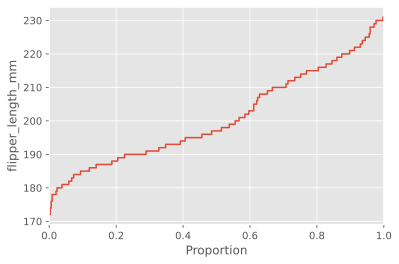

In [10]:
#y축에 할당
sns.ecdfplot(data=penguins, y='flipper_length_mm')

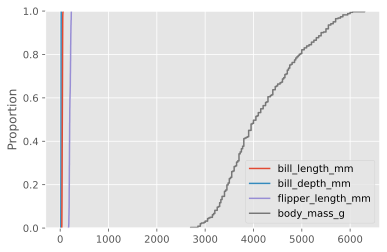

In [11]:
#x, y에 할당되지 않은 경우 데이터 세트는 와이드 형식으로 처리
sns.ecdfplot(data=penguins)

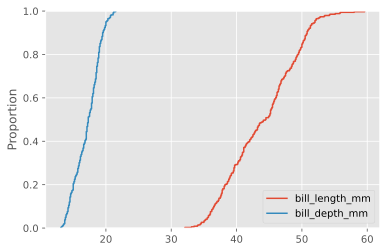

In [12]:
#데이터에 filter를 설정
sns.ecdfplot(data=penguins.filter(like='bill_', axis='columns'))

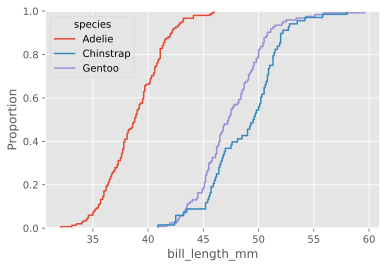

In [13]:
#hue 옵션 설정 
#species를 다른색상으로 표현
sns.ecdfplot(data=penguins, x='bill_length_mm', hue='species')

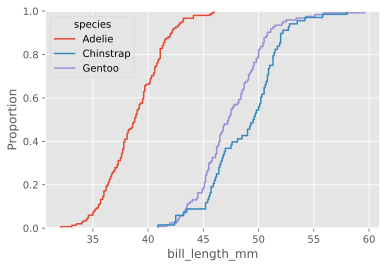

In [15]:
#stat옵션 사용 기본값은 proportion
sns.ecdfplot(data=penguins, x='bill_length_mm', hue='species', stat="proportion")

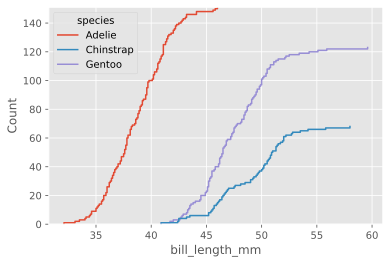

In [16]:
#stat="count" 옵션 사용
sns.ecdfplot(data=penguins, x='bill_length_mm', hue='species', stat="count")

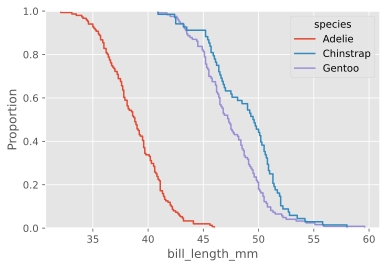

In [17]:
#경험적 보완 CDF(1-CDF)를 플로팅 할 수 있음
sns.ecdfplot(data=penguins, x="bill_length_mm", hue='species', complementary=True)